# ¿Que pasaria si añadiesemos una empresa de comunicaciones como telefonica?

Queria averiguar si añadiendo otros datos podiamos ver un cambio notable y podiamos obtener resultados más positivos

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Para leer stocks de Yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
# "Datetime" nos ayuda a concretar un tiempo
from datetime import datetime

In [4]:
# El tipo de empresas que cogemos, en este caso, empresas que venden moviles
tech_list = ['AAPL', 'MSI', 'XIACF','TEF']

In [5]:
# Damos un  inicio y un final al tiempo para la recolección de datos
tech_list = ['AAPL', 'MSI', 'XIACF', 'TEF']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, MSI, XIACF, TEF]
company_name = ["APPLE", "MOTOROLA", "XIAOMI", "TEF"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-14,4.32,4.35,4.28,4.35,4.187,547200,TEF
2024-06-17,4.39,4.40,4.34,4.35,4.187,525200,TEF
2024-06-18,4.20,4.27,4.20,4.27,4.270,650600,TEF
2024-06-20,4.26,4.31,4.26,4.28,4.280,693600,TEF
2024-06-21,4.26,4.34,4.25,4.31,4.310,811000,TEF
2024-06-24,4.35,4.38,4.34,4.38,4.380,981900,TEF
2024-06-25,4.28,4.30,4.26,4.28,4.280,1260800,TEF
2024-06-26,4.23,4.26,4.22,4.26,4.260,732300,TEF
2024-06-27,4.26,4.34,4.22,4.31,4.310,1960300,TEF


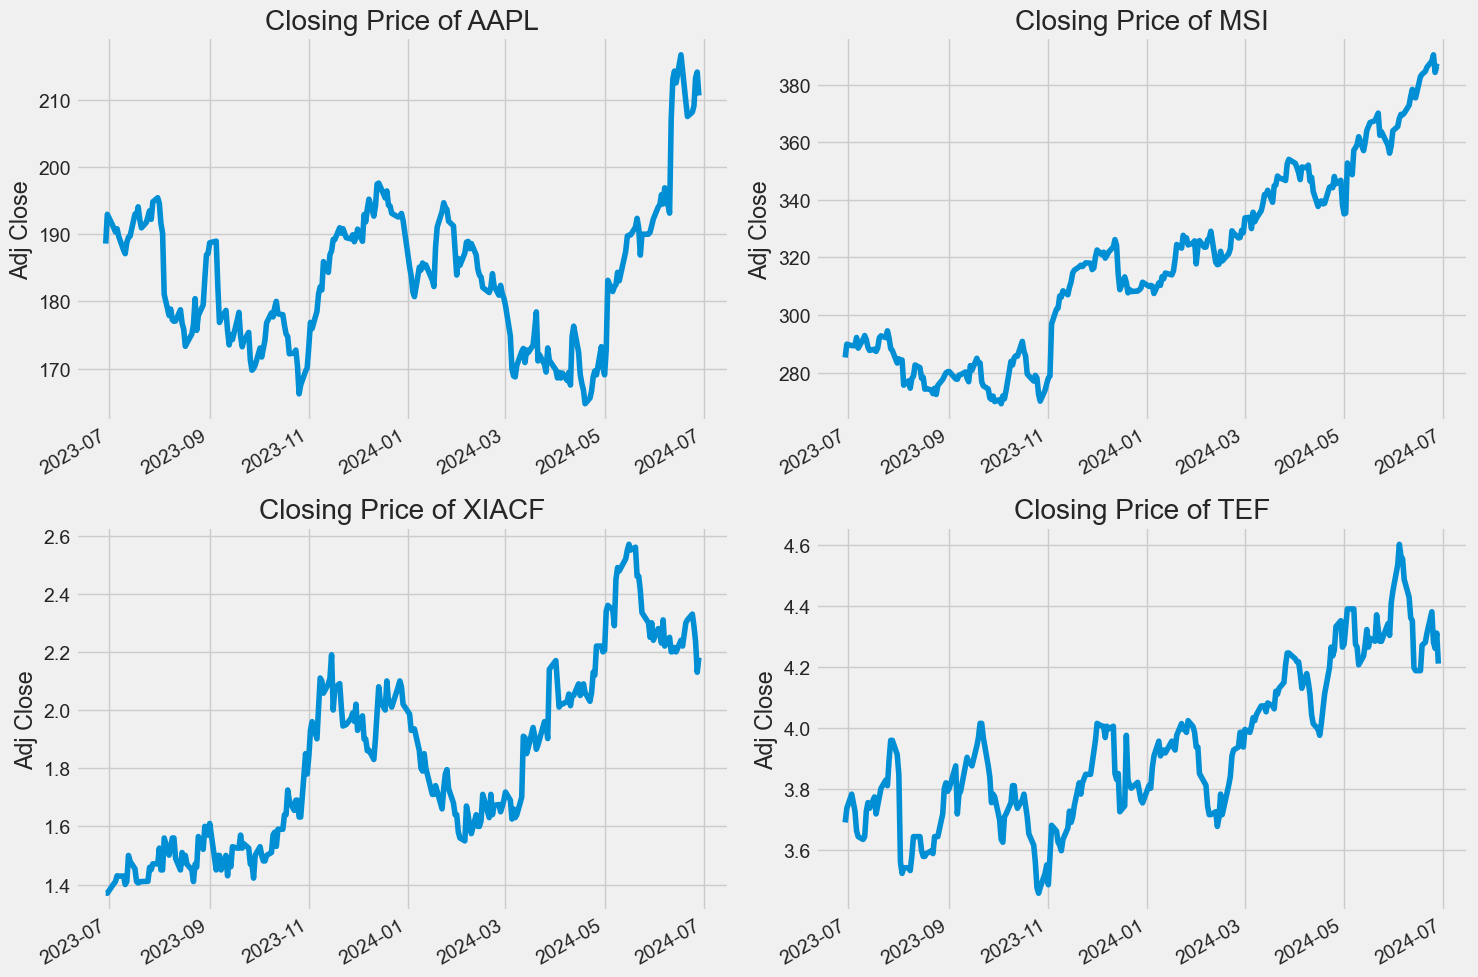

In [6]:
# En estos graficos vemos el historico del precio de cierre 
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

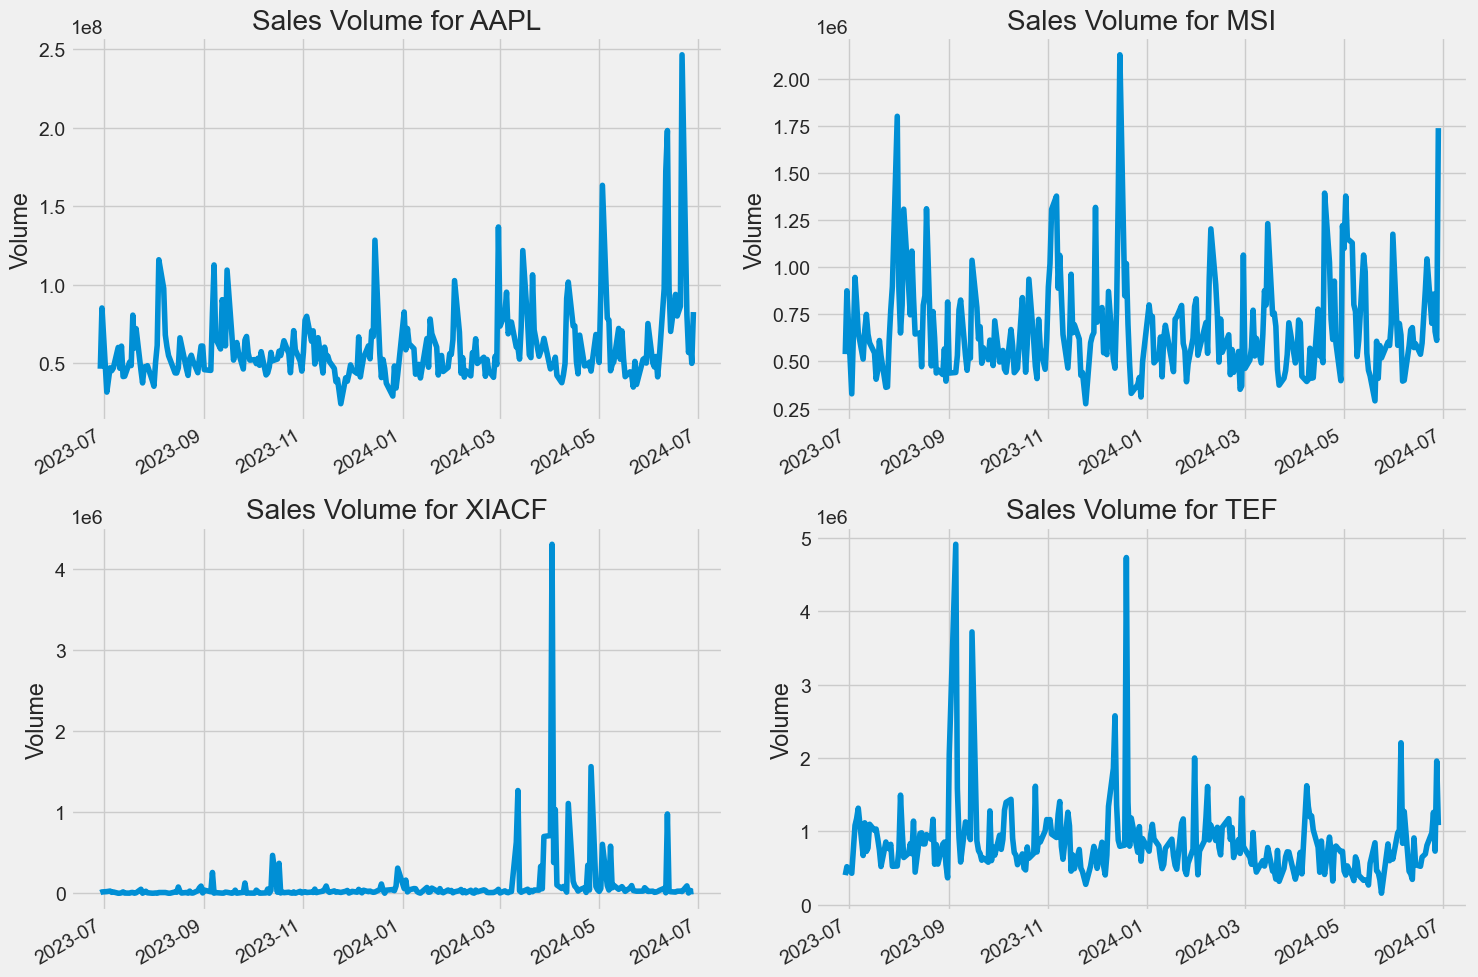

In [7]:
# También visualizaremos los graficos que se tradean cada dia
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [8]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,MSI,TEF,XIACF
Date,,,,
2023-06-29,NaN,NaN,NaN,NaN
2023-06-30,0.023103,0.016251,0.012563,0.000000
2023-07-03,-0.007785,-0.001773,0.012407,0.018248
2023-07-05,-0.005871,-0.000068,-0.014706,0.010753
2023-07-06,0.002509,0.009838,-0.017413,0.014184


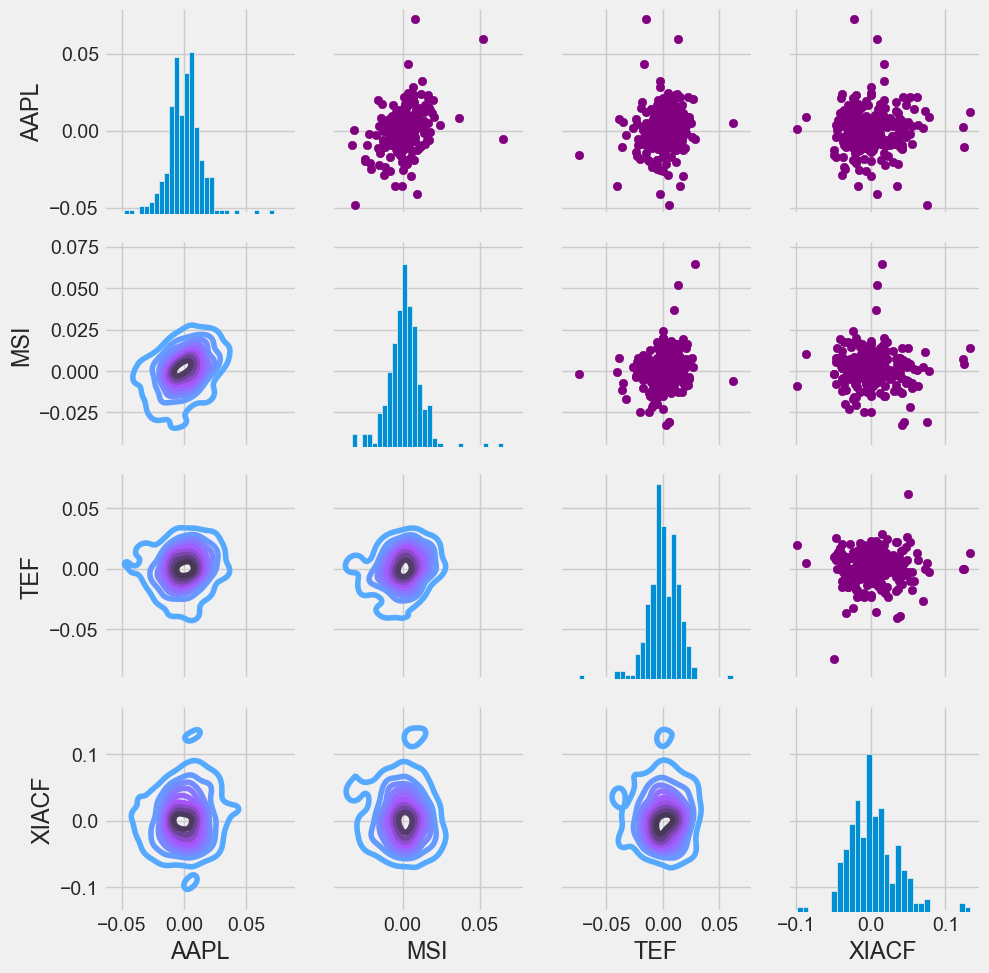

In [9]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

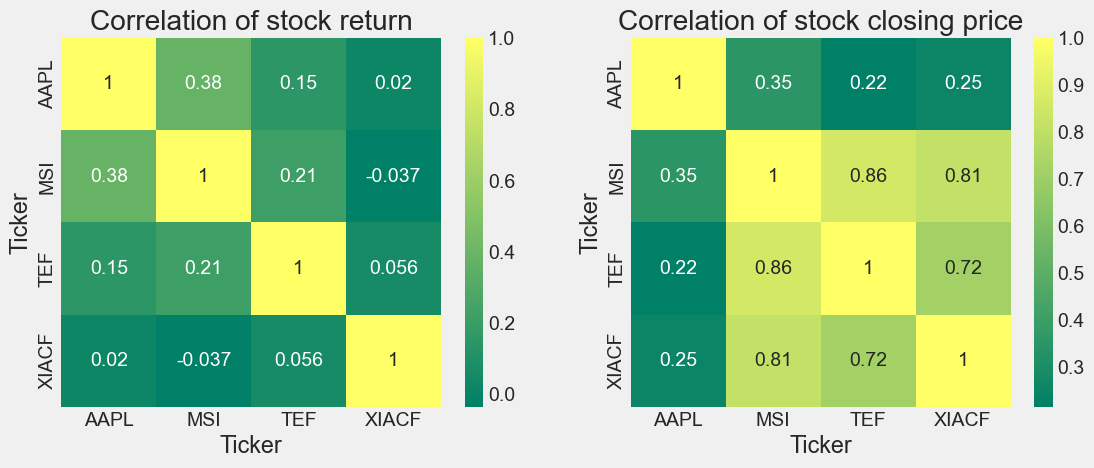

In [10]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Podemos ver que aunque los valores han cambiado, y algunos són más favorables que los anteriores y tenemos menos dispersión, siguen sin ser valores que podamos utilizar. 

Podemos ver también que Apple es la que tiene la peor relación en relacion a los precios de cierre